0. Import packages

In [81]:
# import libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv2


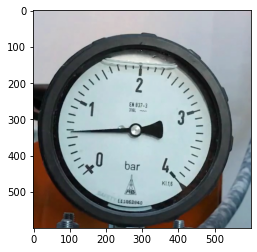

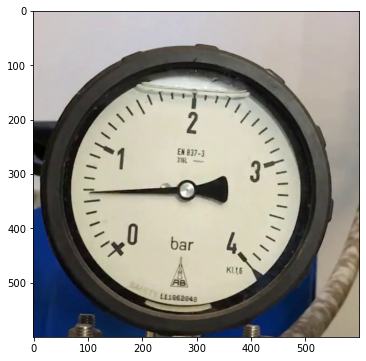

In [82]:
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\AI_ML\Python\PressureGaugeReader\Images\out2\ExtractedImages
imgname = "../Python/PressureGaugeReader/Images/out2/ExtractedImages/ou0001.jpg"
# https://i.stack.imgur.com/5oOGL.jpg
# imgname = "image1.png"

img = cv2.imread(imgname)
plt.imshow(img)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1. Find the watch region

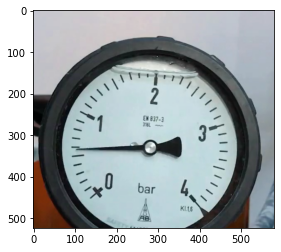

In [83]:
## Threshold in grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshed = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY )

## Find wathc region by counting the projector
h,w = img.shape[:2]
x = np.sum(threshed, axis=0)
y = np.sum(threshed, axis=1)
yy = np.nonzero(y>(w/5*255))[0]
xx = np.nonzero(x > (h/5*255))[0]
region = img[yy[0]:yy[-1], xx[0]:xx[-1]]
# cv2.imwrite("region.png", region)
plt.imshow(region)
# plt.show()

2. Convert to LAB

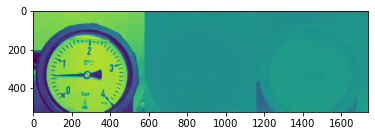

In [84]:
## Change to LAB space
lab = cv2.cvtColor(region, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)
imglab = np.hstack((l,a,b))
# cv2.imwrite("region_lab.png", imglab)
plt.imshow(imglab)
# plt.show()

3. Normalized the a channels, threshold, and do the morphology operation.

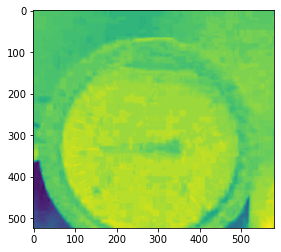

In [92]:
## normalized the a channel to all dynamic range
na = cv2.normalize(b, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
# cv2.imwrite("region_a_normalized.png", na)
plt.imshow(na)

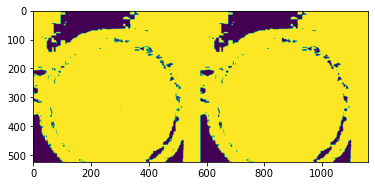

In [93]:
## Threshold to binary
retval, threshed = cv2.threshold(na, thresh = 180,  maxval=255, type=cv2.THRESH_BINARY)

## Do morphology
kernel = cv2.getStructuringElement( cv2.MORPH_ELLIPSE , (3,3))
opened = cv2.morphologyEx(threshed, cv2.MORPH_OPEN,kernel)
res = np.hstack((threshed, opened))
# cv2.imwrite("region_a_binary.png", res)
plt.imshow(res)

4. Find contours, and filter them by some properties (such as area and so on).

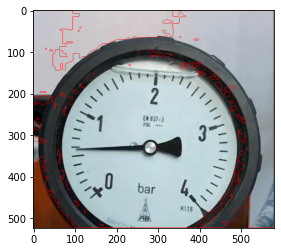

In [94]:
## Find contours
contours = cv2.findContours(opened, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)[-2]

## Draw Contours
res = region.copy()
cv2.drawContours(res, contours, -1, (255,0,0), 1)
# cv2.imwrite("region_contours.png", res)
plt.imshow(res)

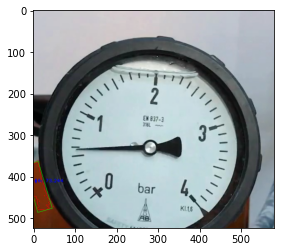

In [88]:
## Filter Contours
for idx, contour in enumerate(contours):
    bbox = cv2.boundingRect(contour)
    area = bbox[-1]*bbox[-2]
    if area < 100:
        continue
    rot_rect = cv2.minAreaRect(contour)
    (cx,cy), (w,h), rot_angle = rot_rect
    rbox = np.int0(cv2.boxPoints(rot_rect))
    cv2.drawContours(res, [rbox], 0, (0,255,0), 1)
    text="#{}: {:2.3f}".format(idx, rot_angle)
    org=(int(cx)-10,int(cy)-10)
    cv2.putText(res, text=text, org = org, fontFace = 1, fontScale=0.8, color=(0,0,255), thickness = 1, lineType=16)

# cv2.imwrite("region_result.png", res)
plt.imshow(res)

In [89]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# imgname = "../Python/PressureGaugeReader/Images/out2/ExtractedImages/ou0001.jpg"
# img = cv2.imread(imgname)
# plt.imshow(img)

# ## Threshold in grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# retval, threshed = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY )

# ## Find wathc region by counting the projector
# h,w = img.shape[:2]
# x = np.sum(threshed, axis=0)
# y = np.sum(threshed, axis=1)
# yy = np.nonzero(y>(w/5*255))[0]
# xx = np.nonzero(x > (h/5*255))[0]
# region = img[yy[0]:yy[-1], xx[0]:xx[-1]]
# # cv2.imwrite("region.png", region)
# plt.imshow(region)

# ## Change to LAB space
# lab = cv2.cvtColor(region, cv2.COLOR_BGR2LAB)
# l,a,b = cv2.split(lab)
# imglab = np.hstack((l,a,b))
# # cv2.imwrite("region_lab.png", imglab)
# plt.imshow(imglab)

# ## normalized the a channel to all dynamic range
# na = cv2.normalize(a, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
# # cv2.imwrite("region_a_normalized.png", na)
# plt.imshow(na)

# ## Threshold to binary
# retval, threshed = cv2.threshold(na, thresh = 180,  maxval=255, type=cv2.THRESH_BINARY)

# ## Do morphology
# kernel = cv2.getStructuringElement( cv2.MORPH_ELLIPSE , (3,3))
# opened = cv2.morphologyEx(threshed, cv2.MORPH_OPEN,kernel)
# res = np.hstack((threshed, opened))
# # cv2.imwrite("region_a_binary.png", res)
# plt.imshow(res)

# ## Find contours
# contours = cv2.findContours(opened, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)[-2]

# ## Draw Contours
# res = region.copy()
# cv2.drawContours(res, contours, -1, (255,0,0), 1)
# # cv2.imwrite("region_contours.png", res)
# plt.imshow(res)

# ## Filter Contours
# for idx, contour in enumerate(contours):
#     bbox = cv2.boundingRect(contour)
#     area = bbox[-1]*bbox[-2]
#     if area < 100:
#         continue
#     rot_rect = cv2.minAreaRect(contour)
#     (cx,cy), (w,h), rot_angle = rot_rect
#     rbox = np.int0(cv2.boxPoints(rot_rect))
#     cv2.drawContours(res, [rbox], 0, (0,255,0), 1)
#     text="#{}: {:2.3f}".format(idx, rot_angle)
#     org=(int(cx)-10,int(cy)-10)
#     #cv2.putText(res, text=text, org = org, fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale=0.7, color=(0,0,255), thickness = 1, lineType=cv2.LINE_AA)
#     cv2.putText(res, text=text, org = org, fontFace = 1, fontScale=0.8, color=(0,0,255), thickness = 1, lineType=16)

# # cv2.imwrite("region_result.png", res)
# plt.imshow(res)
# cv2.imshow("result", res); cv2.waitKey();cv2.destroyAllWindows()